# NYISO Data Analysis

#### **The New York Independent System Operator ([NYISO](https://www.nyiso.com/)) applies cutting-edge technology to operating a reliable electricity system, managing competitive markets for wholesale electricity, and planning for the Empire State's energy future.**

#### The goal of this project is to analyze NYISO grid data for insights that can help guide business leaders to make data-driven decisions to better serve customers.


## **IMPORT LIBRARIES**

In [2]:
import requests
import pandas as pd
import missingno as msno # to visualize any missing data
from datetime import datetime as dt

# visualizing libraries
from bokeh.plotting import figure
from bokeh.io import output_notebook, show, output_file
from bokeh.models import ColumnDataSource, HoverTool, Panel
from bokeh.models.widgets import Tabs
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()


## Introducing the New York State Load data


In [4]:
!wget https://raw.githubusercontent.com/Jameshskelton/datathon/main/Beginner_Track_dataset/OASIS_Real_Time_Dispatch_Actual_Load.csv

--2021-08-10 17:21:31--  https://raw.githubusercontent.com/Jameshskelton/datathon/main/Beginner_Track_dataset/OASIS_Real_Time_Dispatch_Actual_Load.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4862601 (4.6M) [text/plain]
Saving to: ‘OASIS_Real_Time_Dispatch_Actual_Load.csv’

OASIS_Real_Time_Dis 100%[===================>]   4.64M  27.5MB/s    in 0.2s    

2021-08-10 17:21:31 (27.5 MB/s) - ‘OASIS_Real_Time_Dispatch_Actual_Load.csv’ saved [4862601/4862601]



In [5]:
# load up our dataframe from the !wget csv
nyiso = pd.read_csv('OASIS_Real_Time_Dispatch_Actual_Load.csv')


In [6]:
# Looking at the shape of the dataset: 96,943 records and 4 columns for this one
nyiso.shape

(96943, 4)

In [7]:
# first five records of the data
nyiso.head()

RTD End Time Stamp Zone Name  Zone PTID  RTD Actual Load
0  2021/06/01 00:05:00    CAPITL      61757        1089.6426
1  2021/06/01 00:05:00    CENTRL      61754        1326.0402
2  2021/06/01 00:05:00    DUNWOD      61760         487.9715
3  2021/06/01 00:05:00    GENESE      61753         826.5546
4  2021/06/01 00:05:00    HUD VL      61758         790.2523

In [8]:
# summary, count, standard deviation, and means of energy load

nyiso.describe()[['RTD Actual Load']]

RTD Actual Load
count     96943.000000
mean       1741.349547
std        1661.548701
min         172.124600
25%         740.915500
50%        1256.714100
75%        1903.960800
max       10410.844000

In [9]:
# index dtype and columns, non-null values and memory usage of the dataframe

nyiso.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96943 entries, 0 to 96942
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   RTD End Time Stamp  96943 non-null  object 
 1   Zone Name           96943 non-null  object 
 2   Zone PTID           96943 non-null  int64  
 3   RTD Actual Load     96943 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.0+ MB


In [10]:
print('Number of unique Zones:', nyiso['Zone Name'].nunique())
print(nyiso['Zone Name'].unique())

Number of unique Zones: 11
['CAPITL' 'CENTRL' 'DUNWOD' 'GENESE' 'HUD VL' 'LONGIL' 'MHK VL' 'MILLWD'
 'N.Y.C.' 'NORTH' 'WEST']


In [11]:
# different 'Zone Names'
nyiso['Zone Name'].value_counts()

HUD VL    8813
LONGIL    8813
NORTH     8813
CENTRL    8813
MHK VL    8813
MILLWD    8813
GENESE    8813
N.Y.C.    8813
CAPITL    8813
DUNWOD    8813
WEST      8813
Name: Zone Name, dtype: int64

In [12]:
# columns
nyiso.columns

Index(['RTD End Time Stamp', 'Zone Name', 'Zone PTID', 'RTD Actual Load'], dtype='object')

In [13]:
# checking for any null values, here I am counting nulls.. there are none in this dataset

nyiso.isna().sum()

RTD End Time Stamp    0
Zone Name             0
Zone PTID             0
RTD Actual Load       0
dtype: int64

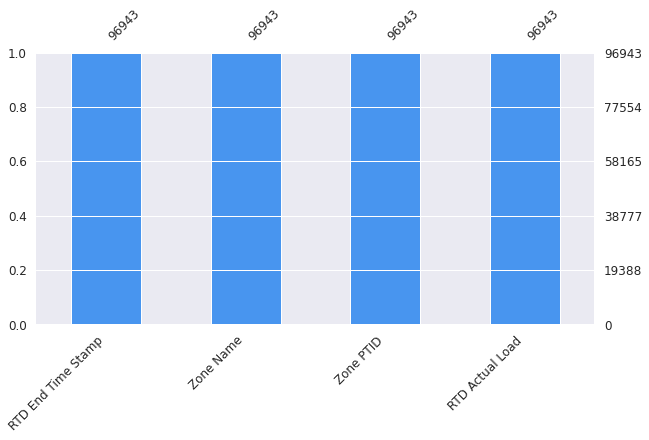

In [14]:
# using missingno to visualize the dataset and see any empty space.. there are none in this dataset

msno.bar(nyiso, color='#4895ef', sort="ascending", figsize=(10,5), fontsize=12)

## Introductory data analytics with the New York State Load data
Performing exploratory data analysis, while telling the story of the New York State's population fluctuations across the different regions in the month of June 2021.

In [15]:
# Let's do some more in depth Exploratory Data Analysis! 
# The minimum and maximum energy load values in the entire dataset

round(nyiso['RTD Actual Load'].agg(['min', 'max']), 2)

min      172.12
max    10410.84
Name: RTD Actual Load, dtype: float64

In [16]:
# grouping zones to find the mean load for each zone

round(nyiso.groupby('Zone Name').mean()[['RTD Actual Load']], 2)

RTD Actual Load
Zone Name                 
CAPITL             1504.34
CENTRL             1830.02
DUNWOD              763.71
GENESE             1205.92
HUD VL             1192.62
LONGIL             2712.69
MHK VL              891.65
MILLWD              358.52
N.Y.C.             6291.17
NORTH               591.05
WEST               1813.14

In [17]:
nyiso.dtypes

RTD End Time Stamp     object
Zone Name              object
Zone PTID               int64
RTD Actual Load       float64
dtype: object

In [18]:
# Converting the column 'RTD End Time Stamp' to datetime
# we can use the datetime package to get deeper understanding and organization.
#nyiso.astype({'RTD End Time Stamp': 'datetime64[ns]'}).dtypes
#astype goes back to the object dtype, doesn't stay in place so I use pd.to_datetime method

nyiso['RTD End Time Stamp'] = pd.to_datetime(nyiso['RTD End Time Stamp'])

In [19]:
nyiso.dtypes

RTD End Time Stamp    datetime64[ns]
Zone Name                     object
Zone PTID                      int64
RTD Actual Load              float64
dtype: object

In [20]:
# we can use the datetime package to 
# get deeper understanding and organization. look below at the example
# for how date time works. Then in the next cell, use that same methodology
# to add a new column to our Pandas DataFrame

# im going to arbitrarily select the 6000th row for the example
nyiso['RTD End Time Stamp'][6001].hour

20

In [21]:
# Adding a column called Hour of Day to the dataframe using datetime
nyiso['Hour of Day'] = nyiso['RTD End Time Stamp'].dt.hour


In [22]:
# checking the dataframe for the new column
nyiso.head()

RTD End Time Stamp Zone Name  Zone PTID  RTD Actual Load  Hour of Day
0 2021-06-01 00:05:00    CAPITL      61757        1089.6426            0
1 2021-06-01 00:05:00    CENTRL      61754        1326.0402            0
2 2021-06-01 00:05:00    DUNWOD      61760         487.9715            0
3 2021-06-01 00:05:00    GENESE      61753         826.5546            0
4 2021-06-01 00:05:00    HUD VL      61758         790.2523            0

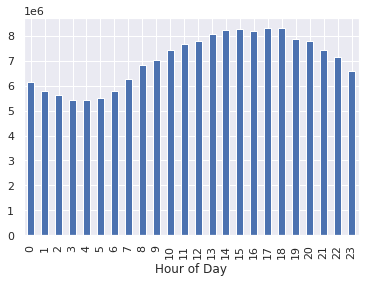

In [30]:
# Grouping by Hour of Day to count how many per hour recordings of the power load were made
# in the dataset

nyiso.groupby('Hour of Day').sum()['RTD Actual Load'].plot(kind='bar')

In [31]:
# sort the values of the DataFrame by the RTD Actual Load, and display the first 5 rows

nyiso.sort_values('RTD Actual Load', ascending=True)[:5]

RTD End Time Stamp Zone Name  Zone PTID  RTD Actual Load  Hour of Day
381   2021-06-01 02:55:00    MILLWD      61759         172.1246            2
39695 2021-06-13 05:50:00    MILLWD      61759         176.4639            5
39552 2021-06-13 04:45:00    MILLWD      61759         177.4223            4
447   2021-06-01 03:25:00    MILLWD      61759         179.5963            3
39717 2021-06-13 06:00:00    MILLWD      61759         180.2307            6

In [32]:
# peak RTD Actual Load for each zone

zone_peaks = nyiso.groupby('Zone Name').max()['RTD Actual Load'].round(2)
zone_peaks

Zone Name
CAPITL     2413.62
CENTRL     2735.69
DUNWOD     1433.62
GENESE     1997.47
HUD VL     2300.58
LONGIL     5036.63
MHK VL     1408.35
MILLWD      697.80
N.Y.C.    10410.84
NORTH       697.85
WEST       2673.43
Name: RTD Actual Load, dtype: float64

In [33]:
# Time of day that has, on average, the highest power load for the Centrl region

centrl = nyiso[nyiso['Zone Name'] == 'CENTRL']

centrl_hours = centrl.groupby('Hour of Day').mean()['RTD Actual Load'].reset_index().round(2)

centrl_max = centrl_hours['RTD Actual Load'].max()

centrl_hours.loc[centrl_hours['RTD Actual Load'] == centrl_max]

Hour of Day  RTD Actual Load
18           18          2118.59

In [34]:
# On june 27th at 5:00 pm, what was the RTD actual load value for the WEST region

west = nyiso['Zone Name'] == 'WEST'
jun_27_5pm = nyiso['RTD End Time Stamp'] == '2021-06-27 05:00:00'

nyiso[west & jun_27_5pm]

RTD End Time Stamp Zone Name  Zone PTID  RTD Actual Load  Hour of Day
84501 2021-06-27 05:00:00      WEST      61752        1658.0417            5

In [35]:
# Select the mean values for all the records with the CAPITL zone name 
nyiso[nyiso['Zone Name'] == 'CAPITL'].mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning:

DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.



Zone PTID          61757.000000
RTD Actual Load     1504.342880
Hour of Day           11.516737
dtype: float64

In [32]:
# Bonus Challenge question. There seems to be some problems with this data
# certain hours of the day have more recordings of the load values. 
# make it so only recordings made at the cadence of every five minutes are used.
# ex: time stamp 2021-06-27 17:00:00	is okay, time stamp 2021-06-27 17:01:12	is not

**From what date range do we have avocado price data?**

In [36]:
start_date = nyiso['RTD End Time Stamp'].min()
end_date = nyiso['RTD End Time Stamp'].max()
print('beginning of data', start_date)
print('end of data', end_date)

beginning of data 2021-06-01 00:05:00
end of data 2021-07-01 00:00:00


## Visualizing New York State Load data
Now that we have familiarized ourselves with the dataset, let's make some visualizations and find patterns.


---

Before plotting a time series. Let's check out price distributions with a histogram plot.

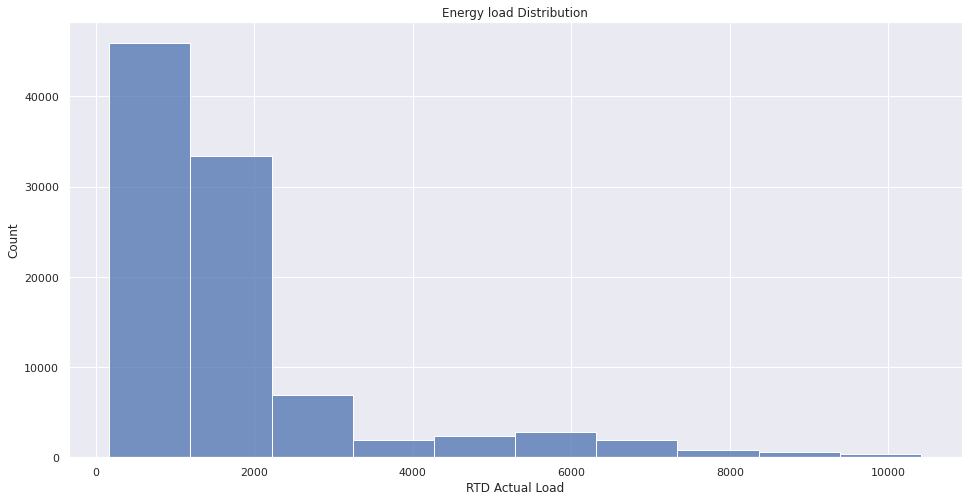

In [41]:
fig, ax = plt.subplots(figsize=(16,8))

ax.set_title('Energy load Distribution')
ax.set_xlabel('RTD Actual Load')
sns.histplot(nyiso['RTD Actual Load'], ax=ax, bins = 10)

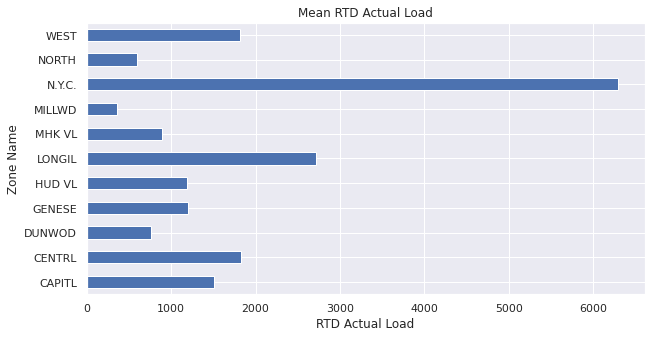

In [42]:
# plotting the mean RTD Actual load 

fig, ax = plt.subplots(figsize=(10, 5))
ax.set_title("Mean RTD Actual Load")
ax.set_xlabel("RTD Actual Load")
nyiso.groupby('Zone Name').mean()['RTD Actual Load'].plot.barh()

Text(0, 0.5, 'RTD Actual Load')

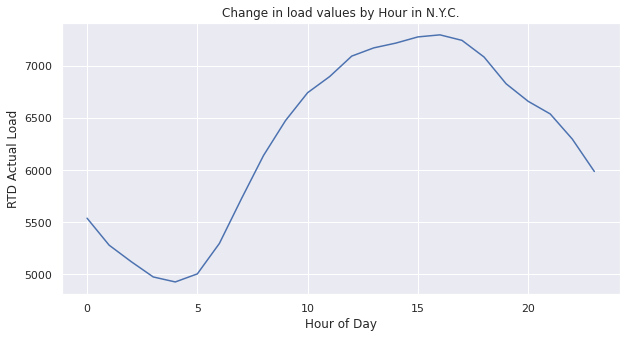

In [43]:
# plotting the change in load values over the day for the N.Y.C. zone using Seaborn

#nyiso.groupby('Hour of Day').sum()['RTD Actual Load']

nyc = nyiso[nyiso['Zone Name'] == 'N.Y.C.']

fig, ax = plt.subplots(figsize=(10,5))

sns.lineplot(data=nyc, x='Hour of Day', y='RTD Actual Load', ci=None)

ax.set_title('Change in load values by Hour in N.Y.C.')
ax.set_ylabel('RTD Actual Load')

## The energy load fluctuates over the days, weeks, and month

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



Text(0, 0.5, 'RTD Actual Load')

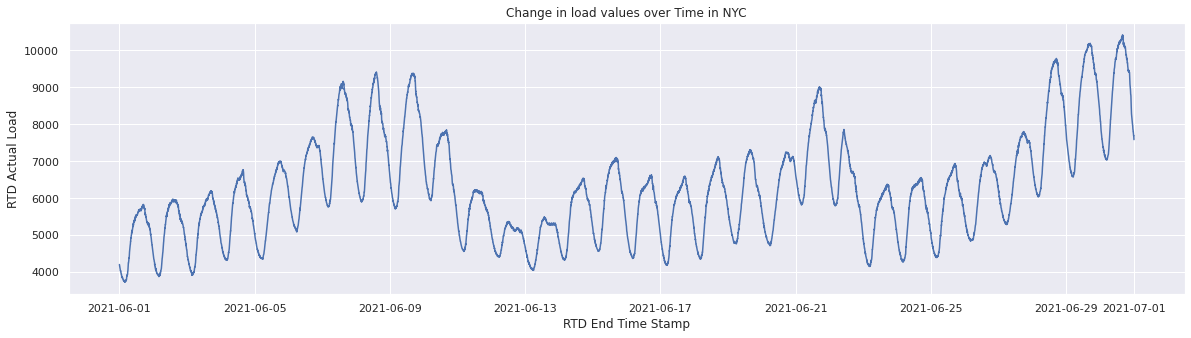

In [44]:
# There are multiple patterns in the data, fluctuations across the day, each week, and over the month.

nyc = nyiso[nyiso['Zone Name'] == 'N.Y.C.']

fig, ax = plt.subplots(figsize=(20,5))

sns.lineplot(nyc['RTD End Time Stamp'], nyc['RTD Actual Load'])

ax.set_title('Change in load values over Time in NYC')
ax.set_ylabel('RTD Actual Load')

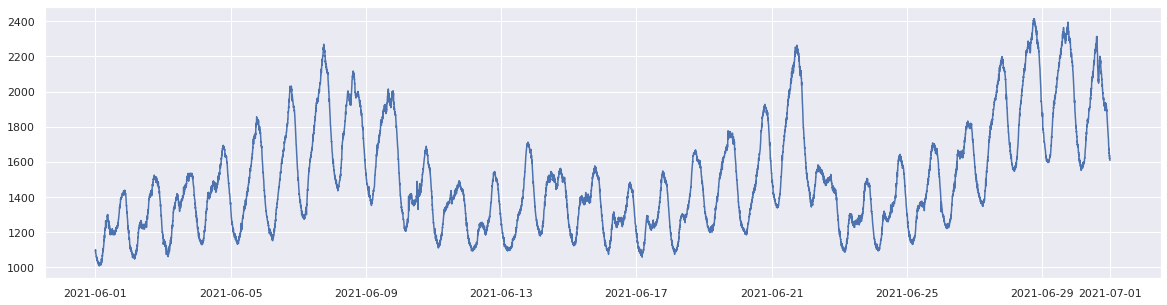

In [45]:
# RTD Actual Load over time for the CAPITL zone.

capitl = nyiso[nyiso['Zone Name'] == 'CAPITL']

fig, ax = plt.subplots(figsize=(20,5))

ax.plot(capitl['RTD End Time Stamp'], capitl['RTD Actual Load'])


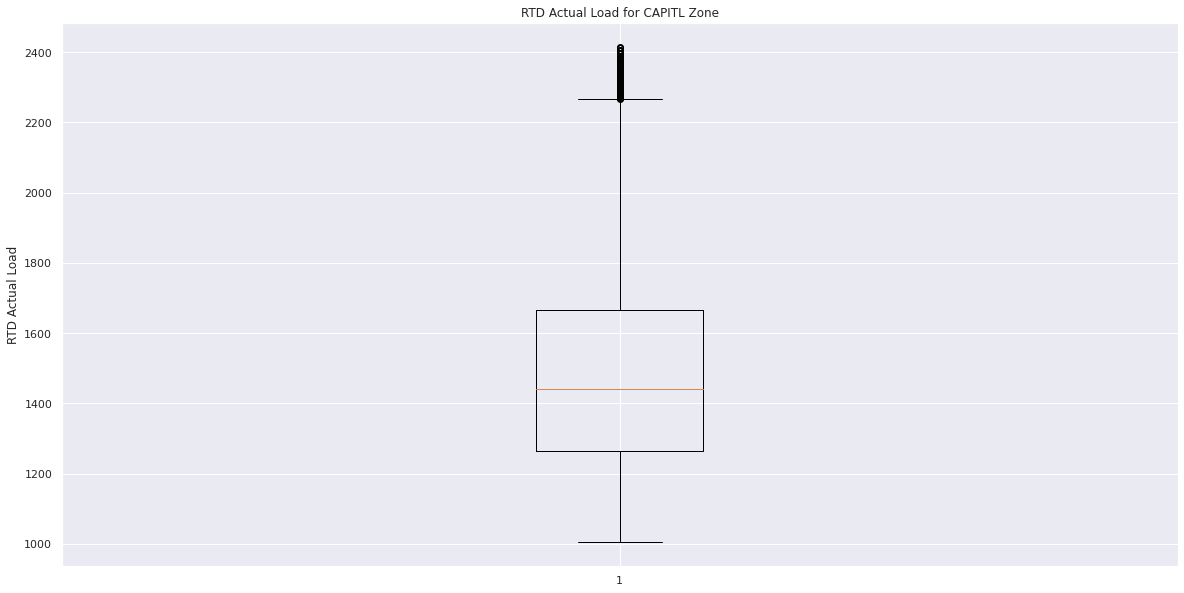

In [46]:
# lets look at the distribution of values more closely with a box plot.
# box plot of the RTD actual load for the CAPITL zone

fig, ax = plt.subplots(figsize = (20,10))
ax.set_title('RTD Actual Load for CAPITL Zone')
ax.boxplot(capitl['RTD Actual Load'])
ax.set_ylabel('RTD Actual Load')

plt.show()

In [40]:
# nyiso['MA'] = nyiso.rolling(window=7)['RTD Actual Load'].mean()
# nyiso['MA']

In [41]:
# trying moving averages
# fig, ax = plt.subplots(figsize = (20,10))

# ax.plot(nyiso['MA'])
# ax.plot(nyiso['MA'], label= 'MA 7 days')
# ax.plot(nyiso['RTD Actual Load'].rolling(14).mean(),label= 'MA 14 days')
# ax.legend(loc='best')
# ax.set_title('RTD Actual Load\nMoving Averages')
# plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



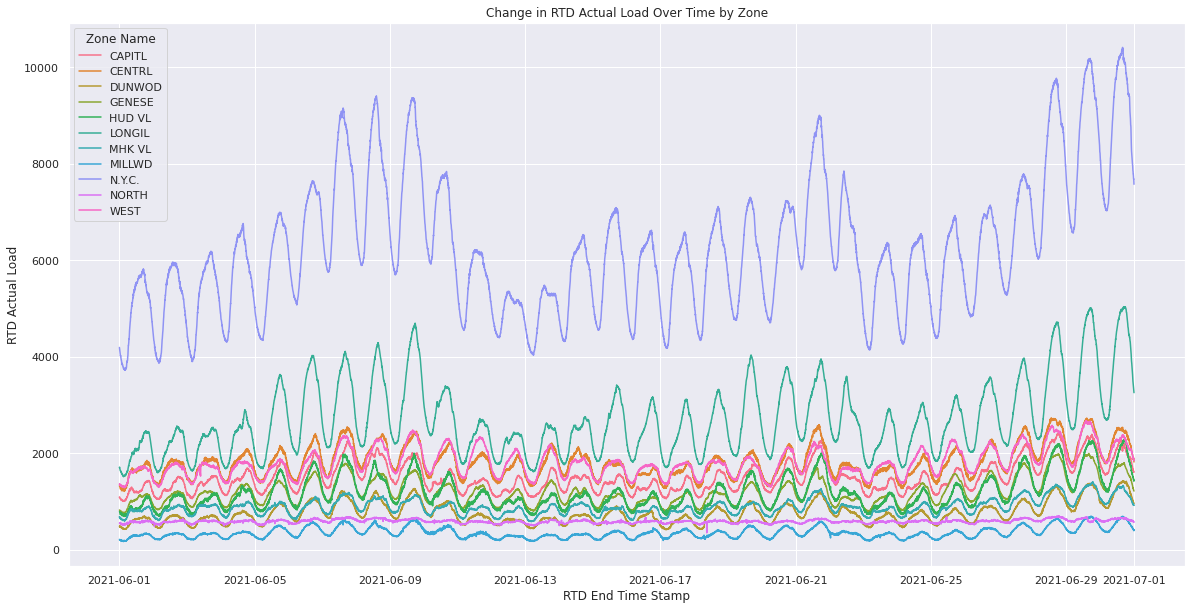

In [47]:
# plotting the different regions RTD Actual Load over time with line plots

fig, ax = plt.subplots(figsize = (20,10))
ax.set_title('Change in RTD Actual Load Over Time by Zone')

sns.lineplot(nyiso['RTD End Time Stamp'], nyiso['RTD Actual Load'], hue = nyiso['Zone Name'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



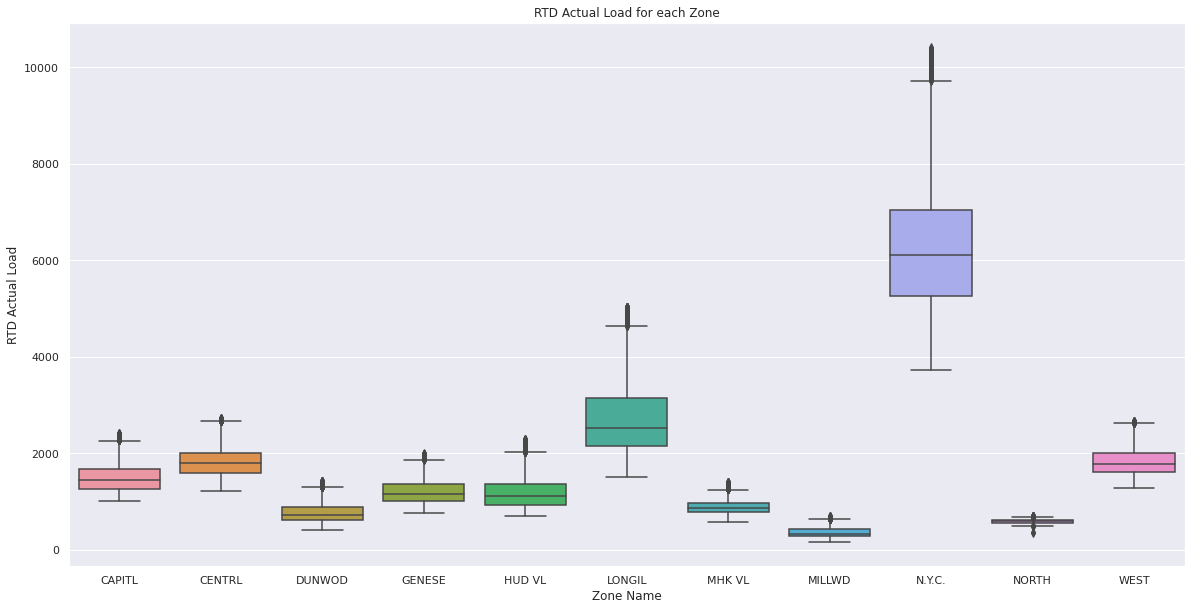

In [48]:
# box plot distributions of RTD Actual Load for each Zone

fig, ax = plt.subplots(figsize=(20,10))
ax.set_title('RTD Actual Load for each Zone')

sns.boxplot(nyiso['Zone Name'], nyiso['RTD Actual Load'])

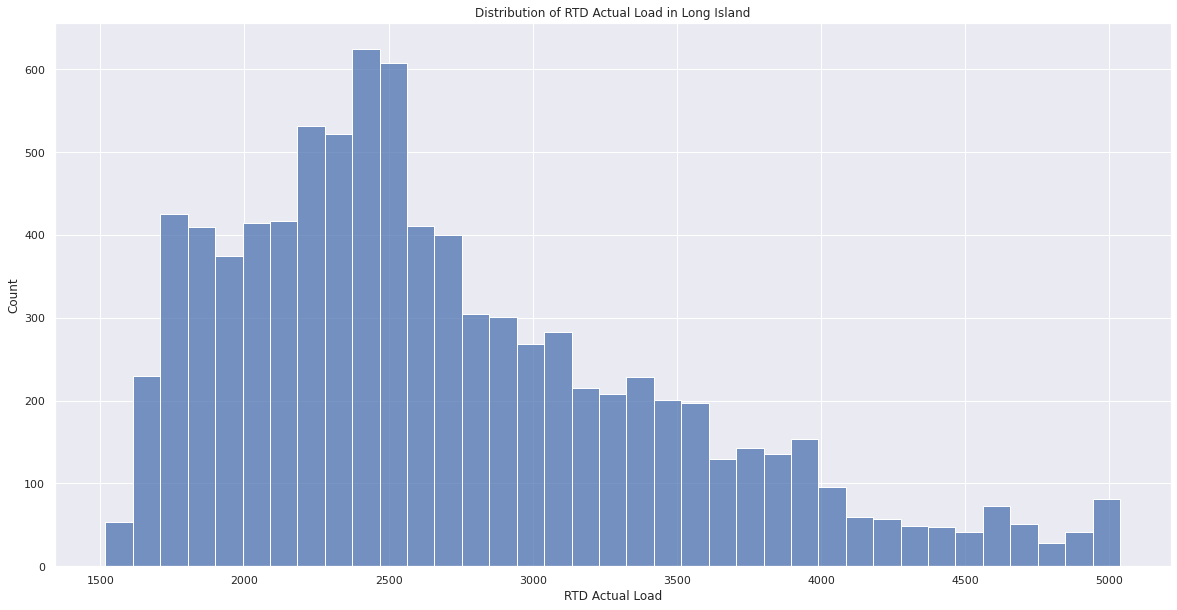

In [49]:
# histogram using seaborn for the LONGIL zone's 'RTD Actual Load'
longil = nyiso[nyiso['Zone Name'] == 'LONGIL']

fig, ax = plt.subplots(figsize=(20,10))
ax.set_title('Distribution of RTD Actual Load in Long Island')
sns.histplot(longil['RTD Actual Load'])

In [50]:
# RTD Actual Loads over time

fig = px.line(data_frame = nyiso, x ='RTD End Time Stamp', y = 'RTD Actual Load', title = 'RTD Actual Load Over Time')

fig.show()

In [51]:
# combined histogram of all the different RTD Actual Loads and zone name to differentiate the plots 
# tip: double click on the legend values on the side to isolate individual histograms

fig = px.histogram(nyiso, x = 'RTD Actual Load', color = 'Zone Name', title = 'Histogram comparing RTD Actual Load for Zones')

fig.show()

In [52]:
# Bokeh plot of the RTD Actual Load against the hour of the day and color the values by zone name

bok = nyiso.copy()
# you have to instantiate the output_notebook for each cell
output_notebook()

output_file("line.html")

# Line plots however are very simple to make
p = figure(plot_width=800, plot_height=400,
           title = 'RTD Actual Load Over Time',
           y_axis_label = 'RTD Actual Load',
          #  You need this to make it do datetime in x axis
           x_axis_type='datetime', 
           x_axis_label= 'Date')

# add a line renderer
p.line(x = nyiso['RTD End Time Stamp'], y = nyiso['RTD Actual Load'], line_width=.5)

show(p)